<a href="https://colab.research.google.com/github/Ami202512/AIML_Project_and_Labs/blob/main/AIML_Module_01_Lab_01_Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Extracting features from data

Module 1, Lab 1<br>



In [9]:
! pip install wikipedia

import wikipedia
import nltk
from nltk.util import ngrams
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import re
import unicodedata
import plotly.express as px
import pandas as pd

  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11679 sha256=8a2c60de760c26cc59bcea1f7770525414d46b890a5593624ca72db735db5fec
  Stored in directory: /root/.cache/pip/wheels/5e/b6/c5/93f3dec388ae76edc830cb42901bb0232504dfc0df02fc50de
Successfully built wikipedia


# Part 1: Features of text
How do we apply machine learning on text? We can't directly use the text as input to our algorithms. We need to convert them to features. In this notebook, we will explore a simple way of converting text to features.

Let us download a few documents off Wikipedia.

In [10]:
topic1 = 'Giraffe'
topic2 = 'Elephant'

wikipedia.set_lang('en')

eng1 = wikipedia.page(topic1).content
eng2 = wikipedia.page(topic2).content

wikipedia.set_lang('fr')

fr1 = wikipedia.page(topic1).content
fr2 = wikipedia.page(topic2).content

This is what the text looks like:

In [11]:
eng2

'Elephants are the largest living land animals. Three living species are currently recognised: the African bush elephant (Loxodonta africana), the African forest elephant (L. cyclotis), and the Asian elephant (Elephas maximus). They are the only surviving members of the family Elephantidae and the order Proboscidea; extinct relatives include mammoths and mastodons. Distinctive features of elephants include a long proboscis called a trunk, tusks, large ear flaps, pillar-like legs, and tough but sensitive grey skin. The trunk is prehensile, bringing food and water to the mouth and grasping objects. Tusks, which are derived from the incisor teeth, serve both as weapons and as tools for moving objects and digging. The large ear flaps assist in maintaining a constant body temperature as well as in communication. African elephants have larger ears and concave backs, whereas Asian elephants have smaller ears and convex or level backs.\nElephants are scattered throughout sub-Saharan Africa, So

In [12]:
fr2

'Les éléphants sont des mammifères proboscidiens de la famille des Éléphantidés. Ils correspondent aujourd\'hui à trois espèces réparties en deux genres distincts. L\'éléphant de savane d\'Afrique et l\'éléphant de forêt d\'Afrique, autrefois regroupés sous la même espèce d\'« éléphant d\'Afrique », appartiennent au genre Loxodonta, tandis que l\'éléphant d\'Asie, anciennement appelé « éléphant indien », appartient au genre Elephas. Ils se différencient par certaines caractéristiques anatomiques, les éléphants d\'Asie étant en général plus petits avec des oreilles plus petites, ou encore une différence du bout de la trompe. Ces espèces survivantes font localement l\'objet de programmes ou de projets de réintroduction et de protection.\nLe mot français « éléphant » vient du mot latin elephantus qui tire son origine du grec ἐλέφας / eléphas, « ivoire » ou « éléphant ».\nL\'éléphant apparait dans de nombreuses cultures. Il est symbole de sagesse dans la culture asiatique, connu pour sa mé

We need to clean this up a bit. Let us remove all the special characters and keep only 26 letters and space. Note that this will remove accented characters in French also. We are also removing all the numbers and spaces. So this is not an ideal solution.

In [13]:
def cleanup(text):
  text = text.lower()  # make it lowercase
  text = re.sub('[^a-z]+', '', text) # only keep characters
  return text

In [14]:
eng1 = cleanup(eng1)
eng2 = cleanup(eng2)
fr1 = cleanup(fr1)
fr2 = cleanup(fr2)

In [15]:
print(eng1)

thegiraffeisalargeafricanhoofedmammalbelongingtothegenusgiraffaitisthetallestlivingterrestrialanimalandthelargestruminantonearthtraditionallygiraffeshavebeenthoughtofasonespeciesgiraffacamelopardaliswithninesubspeciesmostrecentlyresearchersproposeddividingthemintofourextantspeciesduetonewresearchintotheirmitochondrialandnucleardnaandindividualspeciescanbedistinguishedbytheirfurcoatpatternssevenotherextinctspeciesofgiraffaareknownfromthefossilrecordthegiraffesdistinguishingcharacteristicsareitsextremelylongneckandlegshornlikeossiconesandspottedcoatpatternsitisclassifiedunderthefamilygiraffidaealongwithitsclosestextantrelativetheokapiitsscatteredrangeextendsfromchadinthenorthtosouthafricainthesouthandfromnigerinthewesttosomaliaintheeastgiraffesusuallyinhabitsavannahsandwoodlandstheirfoodsourceisleavesfruitsandflowersofwoodyplantsprimarilyacaciaspecieswhichtheybrowseatheightsmostothergroundbasedherbivorescannotreachlionsleopardsspottedhyenasandafricanwilddogsmaypreyupongiraffesgiraffesliv

Now let us calculate the frequency of the character n-grams. N-grams are groups of characters of size n. A unigram is a single character and a bigram is a group of two characters and so on.

Let us count the frequency of each character in a text and plot it in a histogram.

In [16]:
# convert a tuple of characters to a string
def tuple2string(tup):
  st = ''
  for ii in tup:
    st = st + ii
  return st

# convert a tuple of tuples to a list of strings
def key2string(keys):
  return [tuple2string(i) for i in keys]

# plot the histogram
def plothistogram(ngram):
  keys = key2string(ngram.keys())
  values = list(ngram.values())

  # sort the keys in alphabetic order
  combined = zip(keys, values)
  zipped_sorted = sorted(combined, key=lambda x: x[0])
  keys, values = map(list, zip(*zipped_sorted))
  plt.bar(keys, values)

Let us compare the histograms of English pages and French pages. Can you spot a difference?

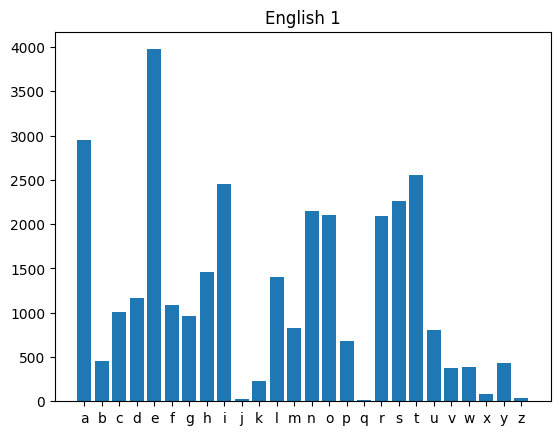

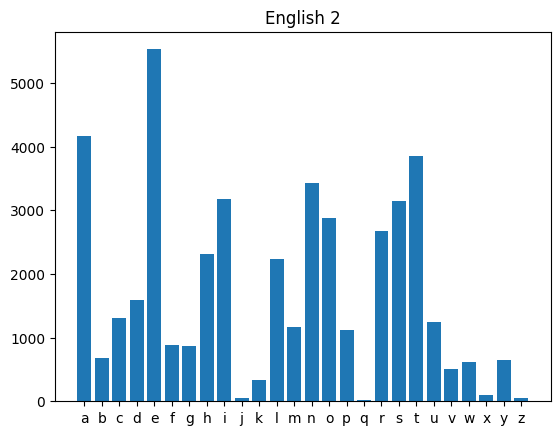

In [17]:
unigram_eng1 = Counter(ngrams(eng1,1))
plothistogram(unigram_eng1)
plt.title('English 1')
plt.show()
unigram_eng2 = Counter(ngrams(eng2,1))
plothistogram(unigram_eng2)
plt.title('English 2')
plt.show()

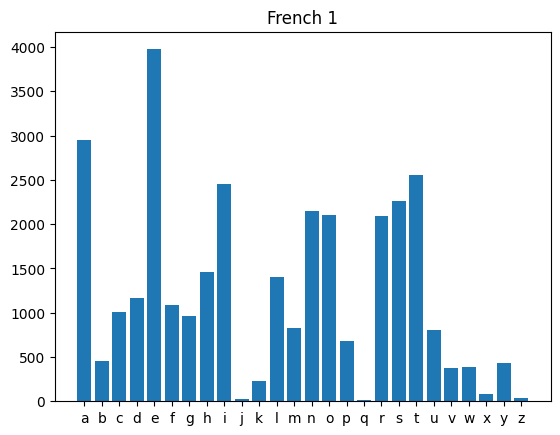

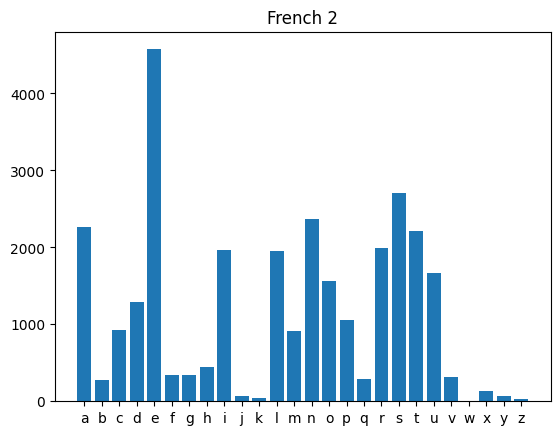

In [18]:
unigram_fr1 = Counter(ngrams(fr1,1))
plothistogram(unigram_eng1)
plt.title('French 1')
plt.show()

unigram_fr2 = Counter(ngrams(fr2,1))
plothistogram(unigram_fr2)
plt.title('French 2')
plt.show()

We can see that the unigrams for French and English are very similar. So this is not a good feature if we want to distinguish between English and French. Let us look at bigrams.

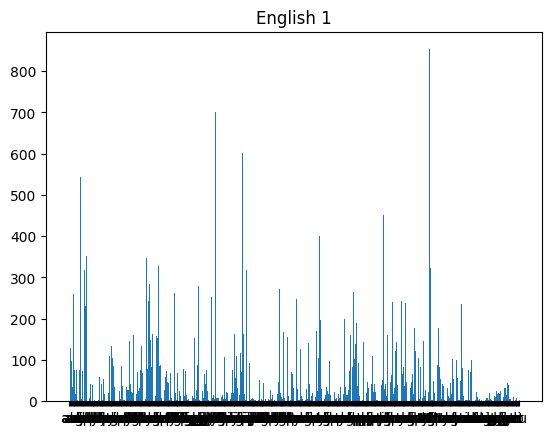

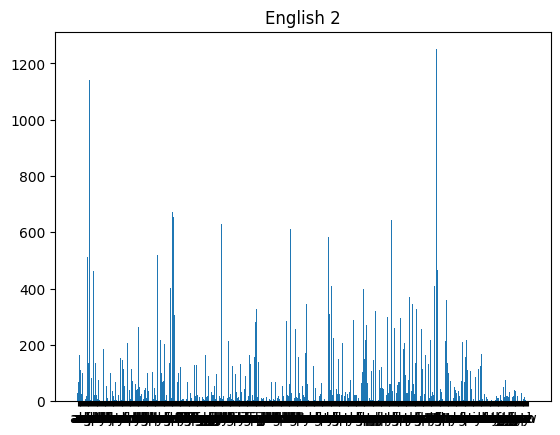

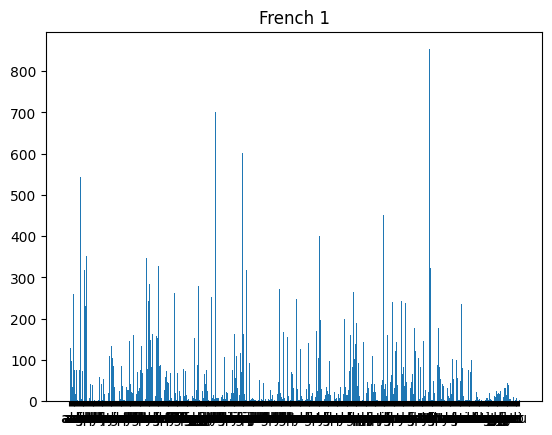

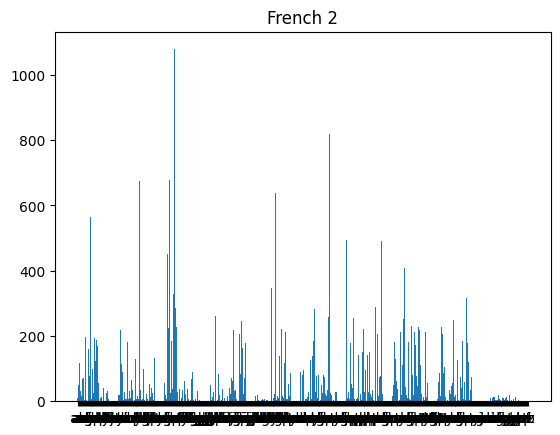

In [19]:
bigram_eng1 = Counter(ngrams(eng1,2)) # bigrams
plothistogram(bigram_eng1)
plt.title('English 1')
plt.show()

bigram_eng2 = Counter(ngrams(eng2,2))
plothistogram(bigram_eng2)
plt.title('English 2')
plt.show()

bigram_fr1 = Counter(ngrams(fr1,2))
plothistogram(bigram_eng1)
plt.title('French 1')
plt.show()

bigram_fr2 = Counter(ngrams(fr2,2))
plothistogram(bigram_fr2)
plt.title('French 2')
plt.show()

Another way to visualize bigrams is to use a 2-dimensional graph.

In [20]:
def plotbihistogram(ngram):
  freq = np.zeros((26,26))
  for ii in range(26):
    for jj in range(26):
      freq[ii,jj] = ngram[(chr(ord('a')+ii), chr(ord('a')+jj))]
  plt.imshow(freq, cmap = 'jet')
  return freq

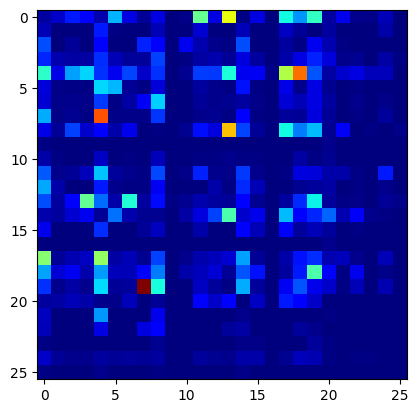

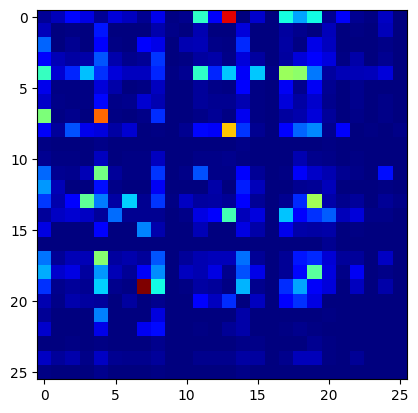

In [21]:
bieng1 = plotbihistogram(bigram_eng1)
plt.show()
bieng2 = plotbihistogram(bigram_eng2)

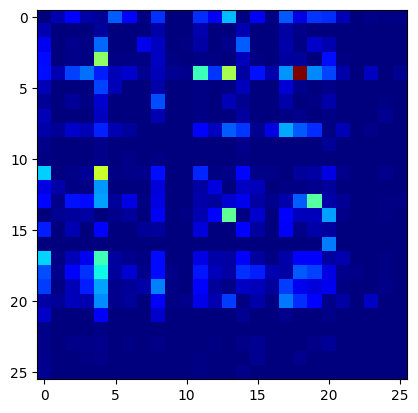

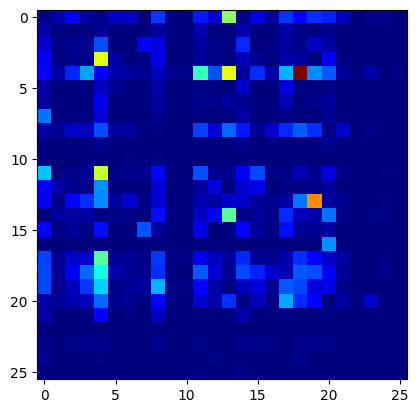

In [22]:
bifr1 = plotbihistogram(bigram_fr1)
plt.show()
bifr2 = plotbihistogram(bigram_fr2)

Let us look at the top 10 ngrams for each text.

In [23]:
from IPython.core.debugger import set_trace

def ind2tup(ind):
  ind = int(ind)
  i = int(ind/26)
  j = int(ind%26)
  return (chr(ord('a')+i), chr(ord('a')+j))

def ShowTopN(bifreq, n=10):
  f = bifreq.flatten()
  arg = np.argsort(-f)
  for ii in range(n):
    print(f'{ind2tup(arg[ii])} : {f[arg[ii]]}')

In [24]:
print('\nEnglish 1:')
ShowTopN(bieng1)
print('\nEnglish 2:')
ShowTopN(bieng2)
print('\nFrench 1:')
ShowTopN(bifr1)
print('\nFrench 2:')
ShowTopN(bifr2)


English 1:
('t', 'h') : 853.0
('h', 'e') : 700.0
('e', 's') : 674.0
('i', 'n') : 601.0
('a', 'n') : 543.0
('e', 'r') : 483.0
('r', 'e') : 452.0
('r', 'a') : 439.0
('a', 'l') : 406.0
('n', 'd') : 401.0

English 2:
('t', 'h') : 1250.0
('a', 'n') : 1140.0
('h', 'e') : 1000.0
('i', 'n') : 878.0
('n', 't') : 679.0
('e', 'r') : 673.0
('e', 's') : 653.0
('r', 'e') : 644.0
('h', 'a') : 628.0
('l', 'e') : 613.0

French 1:
('e', 's') : 791.0
('l', 'e') : 472.0
('e', 'n') : 438.0
('d', 'e') : 416.0
('o', 'n') : 370.0
('n', 't') : 359.0
('r', 'e') : 337.0
('e', 'l') : 335.0
('s', 'e') : 291.0
('r', 'a') : 265.0

French 2:
('e', 's') : 1078.0
('n', 't') : 819.0
('e', 'n') : 679.0
('d', 'e') : 675.0
('l', 'e') : 638.0
('a', 'n') : 564.0
('o', 'n') : 494.0
('r', 'e') : 490.0
('e', 'l') : 452.0
('s', 'e') : 408.0


We observe that the bigrams are similar across different topics but different across languages. Thus, the bigram frequency is a good feature for distinguishing languages, but not for distinguishing topics.

Thus, we were able to convert a many-dimensional input (the text) to 26 dimesions (unigrams) or 26*26 dimensions (bigrams).


A few ways to explore:

1. Try with different languages. For example, Italian.

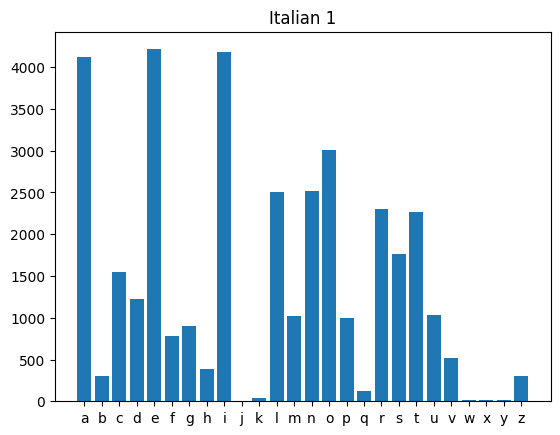

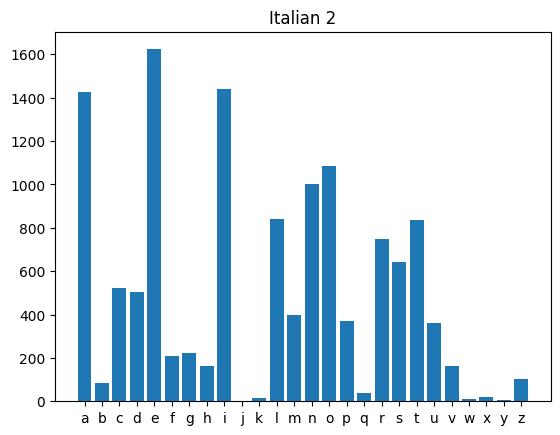

In [25]:
wikipedia.set_lang('it')
topic1 = 'Giraffa'
topic2 = 'Elefante'
italian1 = wikipedia.page(topic1).content
italian2 = wikipedia.page(topic2).content
italian1 = cleanup(italian1)
italian2 = cleanup(italian2)

# UNIGRAM
unigram_italian1 = Counter(ngrams(italian1, 1))
unigram_italian2 = Counter(ngrams(italian2, 1))
plothistogram(unigram_italian1)
plt.title('Italian 1')
plt.show()
plothistogram(unigram_italian2)
plt.title('Italian 2')
plt.show()

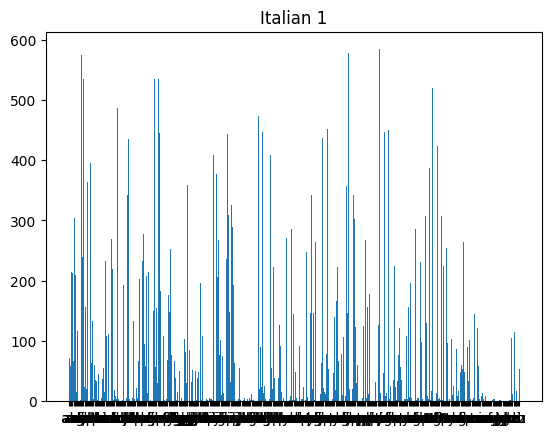

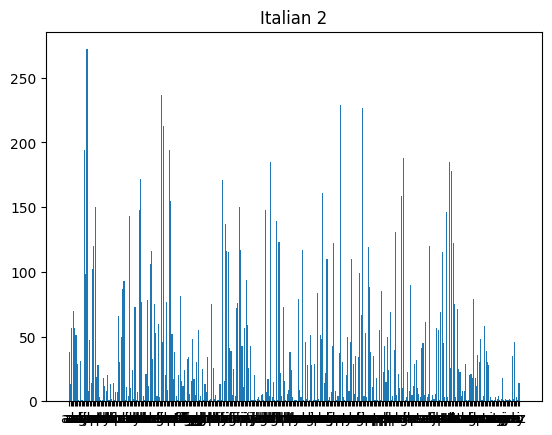

In [26]:
# BIGRAM
bigram_italian1 = Counter(ngrams(italian1,2))
bigram_italian2 = Counter(ngrams(italian2,2))

plothistogram(bigram_italian1)
plt.title('Italian 1')
plt.show()

plothistogram(bigram_italian2)
plt.title('Italian 2')
plt.show()

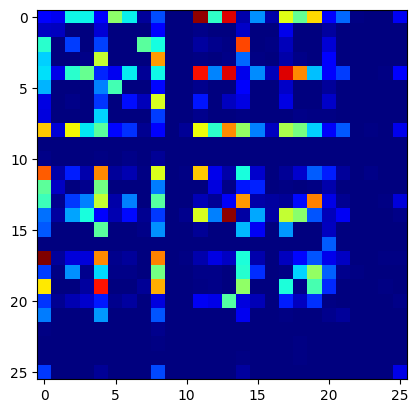

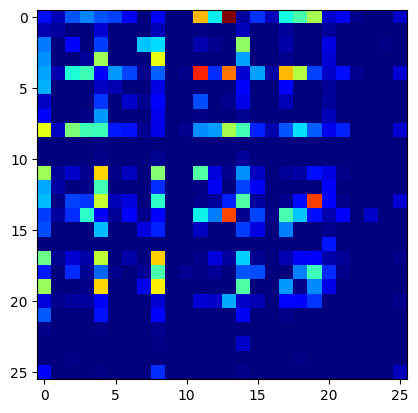

In [27]:
# BIHISTOGRAM
biitalian1 = plotbihistogram(bigram_italian1)
plt.show()
biitalian2 = plotbihistogram(bigram_italian2)
plt.show()

In [28]:
print('\nItalian 1:')
ShowTopN(biitalian1)
print('\nItalian 2:')
ShowTopN(biitalian2)


Italian 1:
('r', 'a') : 584.0
('o', 'n') : 577.0
('a', 'l') : 574.0
('a', 'n') : 535.0
('e', 'r') : 534.0
('e', 'n') : 534.0
('e', 'l') : 521.0
('t', 'e') : 519.0
('c', 'o') : 486.0
('l', 'a') : 473.0

Italian 2:
('a', 'n') : 272.0
('e', 'l') : 237.0
('n', 't') : 229.0
('o', 'n') : 227.0
('e', 'n') : 213.0
('e', 'r') : 194.0
('a', 'l') : 194.0
('r', 'i') : 188.0
('l', 'e') : 185.0
('t', 'e') : 185.0


2. The topics we used are quite similar, wikipedia articles of 'elephant' and 'giraffe'. What happens if we use very different topics? What if we use text from another source than Wikipedia?


English 1
('t', 'h') : 232.0
('r', 'e') : 205.0
('h', 'e') : 201.0
('i', 'n') : 200.0
('a', 'n') : 200.0
('e', 's') : 182.0
('a', 'r') : 167.0
('a', 'l') : 139.0
('e', 'r') : 134.0
('n', 't') : 132.0


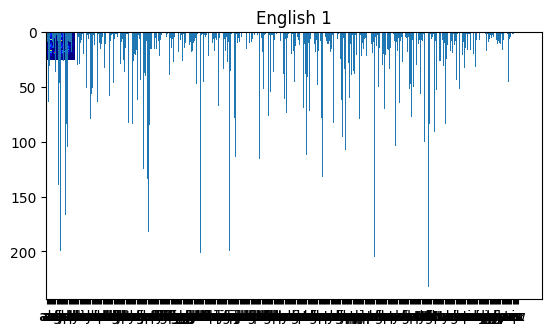


English 2
('t', 'h') : 1328.0
('h', 'e') : 1198.0
('i', 'n') : 1063.0
('e', 'r') : 1059.0
('b', 'a') : 772.0
('a', 'n') : 727.0
('a', 'l') : 709.0
('a', 't') : 703.0
('e', 's') : 676.0
('s', 't') : 654.0


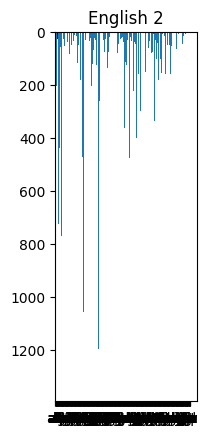


Italian 1
('a', 'l') : 400.0
('o', 'n') : 399.0
('a', 'n') : 390.0
('t', 'a') : 375.0
('l', 'a') : 368.0
('d', 'i') : 349.0
('p', 'i') : 313.0
('e', 'n') : 309.0
('c', 'o') : 303.0
('e', 'r') : 296.0


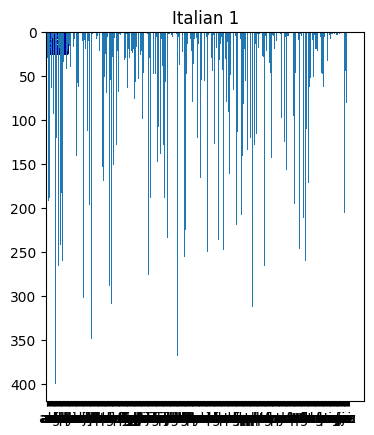


Italian 2
('a', 'l') : 995.0
('o', 'n') : 959.0
('l', 'a') : 901.0
('r', 'e') : 863.0
('e', 'r') : 821.0
('d', 'i') : 764.0
('l', 'l') : 749.0
('e', 's') : 737.0
('e', 'n') : 731.0
('a', 't') : 707.0


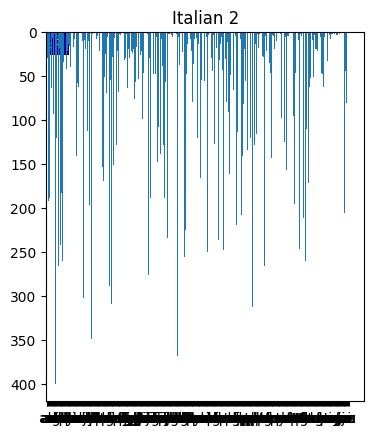

In [29]:
topic1 = "Pizza"
topic2 = "Basketball"

wikipedia.set_lang('en')
en_food = wikipedia.page(topic1).content
en_sport = wikipedia.page(topic2).content

wikipedia.set_lang('it')
it_food = wikipedia.page(topic1).content
it_sport = wikipedia.page(topic2).content

enfood = cleanup(en_food)
ens = cleanup(en_sport)
itfood = cleanup(it_food)
its = cleanup(it_sport)

# BIGRAMS
bigram_enfood = Counter(ngrams(enfood,2))
bigram_ens = Counter(ngrams(ens,2))
bigram_itfood = Counter(ngrams(itfood,2))
bigram_its = Counter(ngrams(its,2))

print("\nEnglish 1")
bienfood = plotbihistogram(bigram_enfood)
ShowTopN(bienfood)

plothistogram(bigram_enfood)
plt.title("English 1")
plt.show()

print("\nEnglish 2")
biens = plotbihistogram(bigram_ens)
ShowTopN(biens)

plothistogram(bigram_ens)
plt.title("English 2")
plt.show()

print("\nItalian 1")
biitfood = plotbihistogram(bigram_itfood)
ShowTopN(biitfood)

plothistogram(bigram_itfood)
plt.title("Italian 1")
plt.show()

print("\nItalian 2")
biits = plotbihistogram(bigram_its)
ShowTopN(biits)

plothistogram(bigram_itfood)
plt.title("Italian 2")
plt.show()

3. How can we use and visualize trigrams and higher n-grams?

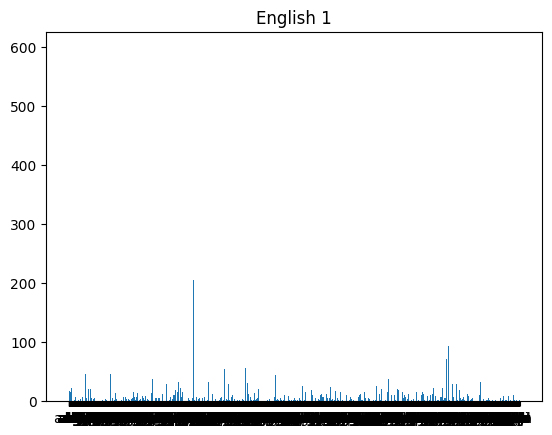

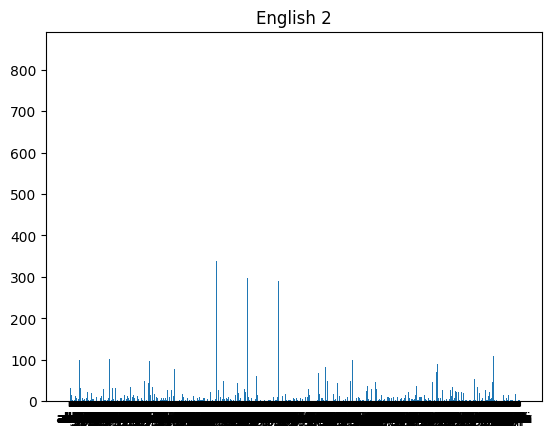

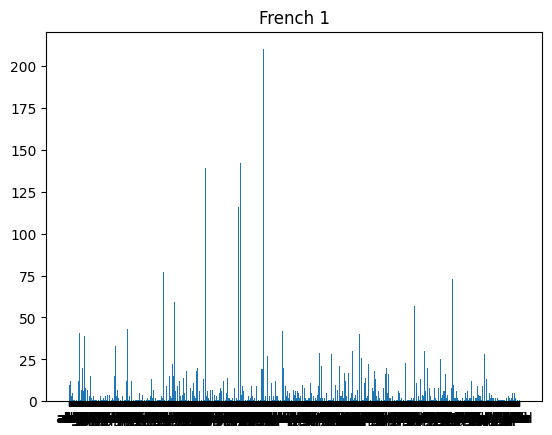

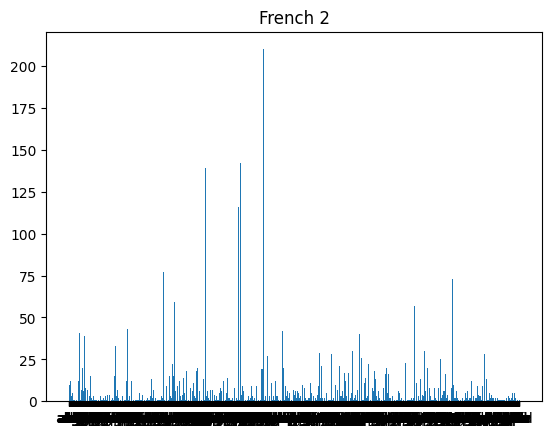

In [30]:
trigram_eng1 = Counter(ngrams(eng1,3))
trigram_eng2 = Counter(ngrams(eng2,3))

trigram_fr1 = Counter(ngrams(fr1,3))
trigram_fr2 = Counter(ngrams(fr2,3))

plothistogram(trigram_eng1)
plt.title("English 1")
plt.show()

plothistogram(trigram_eng2)
plt.title("English 2")
plt.show()

plothistogram(trigram_fr1)
plt.title("French 1")
plt.show()

plothistogram(trigram_fr1)
plt.title("French 2")
plt.show()

# Part 2: Written numbers

We will use a subset of the MNIST dataset. Each input character is represented in a 28*28 array. Let us see if we can extract some simple features from these images which can help us distinguish between the digits.

Load the dataset:

In [31]:
from keras.datasets import mnist

#loading the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Extract a subset of the data for our experiment:

In [32]:
no1 = train_X[train_y==1,:,:]
no0 = train_X[train_y==0,:,:]

Let us visualize a few images here:

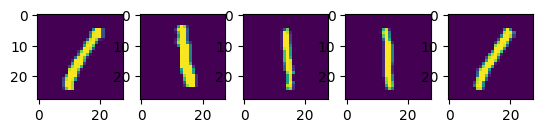

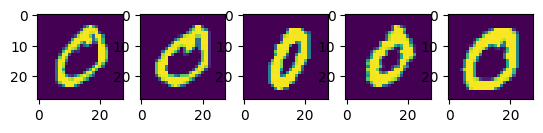

In [33]:
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no1[ii,:,:])
plt.show()
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no0[ii,:,:])
plt.show()

suNow, let us start with a simple feature: the sum of all pixels and see how good this feature is.

In [34]:
sum1 = np.sum(no1>0, (1,2)) # threshold before adding up
sum0 = np.sum(no0>0, (1,2))

Let us visualize how good this feature is: (X-axis is mean, y-axis is the digit)

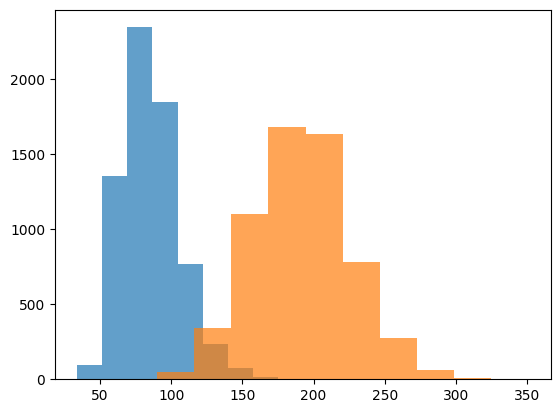

In [35]:
plt.hist(sum1, alpha=0.7);
plt.hist(sum0, alpha=0.7);

We can already see that this feature separates the two classes quite well.

Let us look at another, more complicated feature. We will count the number black pixels that are surrounded on four sides by non-black pixels, or "hole pixels".

In [36]:
def cumArray(img):
  img2 = img.copy()
  for ii in range(1, img2.shape[1]):
    img2[ii,:] = img2[ii,:] + img2[ii-1,:]  # for every row, add up all the rows above it.
  img2 = img2>0
  return img2

def getHolePixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3) # rotate and cumulate it again for differnt direction
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4 # this will create a binary image with all the holes filled in.
  hole = hull & ~ (img>0) # remove the original digit to leave behind the holes
  return hole

Visualize a few:

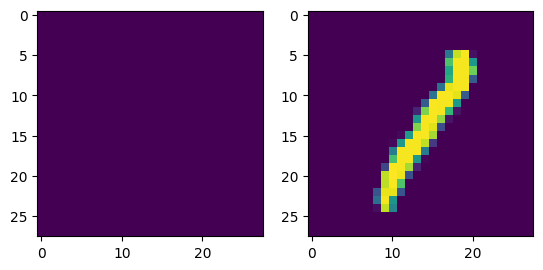

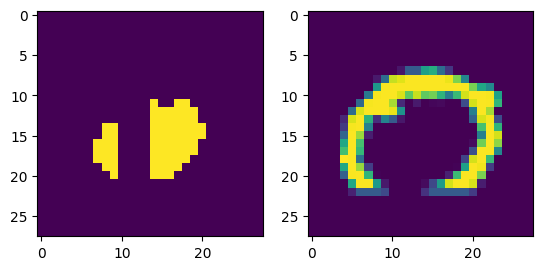

In [37]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getHolePixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

Now let us plot the number of hole pixels and see how this feature behaves

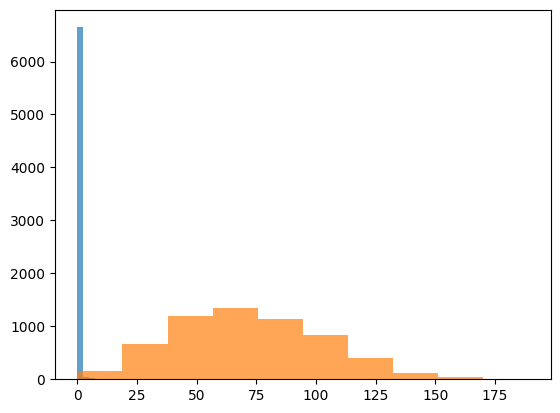

In [38]:
hole1 = np.array([getHolePixels(i).sum() for i in no1])
hole0 = np.array([getHolePixels(i).sum() for i in no0])

plt.hist(hole1, alpha=0.7);
plt.hist(hole0, alpha=0.7);

This feature works even better to distinguish between one and zero.


Now let us try the number of pixels in the 'hull' or the number with the holes filled in:

In [39]:
def getHullPixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3) # rotate and cumulate it again for differnt direction
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4 # this will create a binary image with all the holes filled in.
  return hull

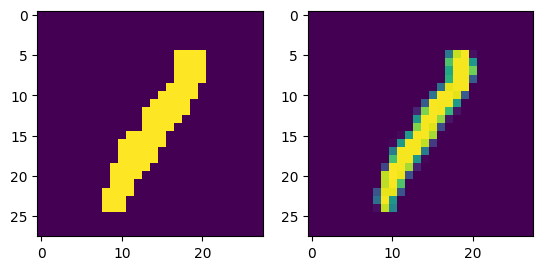

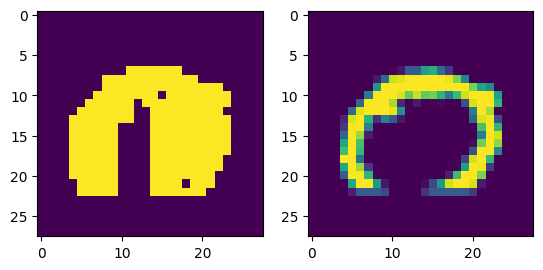

In [40]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getHullPixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

Plotting the number of hull pixels versus the digit:

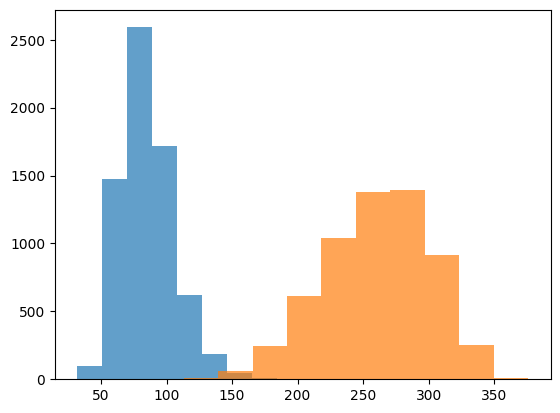

In [41]:
hull1 = np.array([getHullPixels(i).sum() for i in no1])
hull0 = np.array([getHullPixels(i).sum() for i in no0])

plt.hist(hull1, alpha=0.7);
plt.hist(hull0, alpha=0.7);

Let us try one more feature, where we look at the number of boundary pixels in each image.

In [42]:
def minus(a, b):
  return a & ~ b

def getBoundaryPixels(img):
  img = img.copy()>0  # binarize the image
  rshift = np.roll(img, 1, 1)
  lshift = np.roll(img, -1 ,1)
  ushift = np.roll(img, -1, 0)
  dshift = np.roll(img, 1, 0)
  boundary = minus(img, rshift) | minus(img, lshift) | minus(img, ushift) | minus(img, dshift)
  return boundary

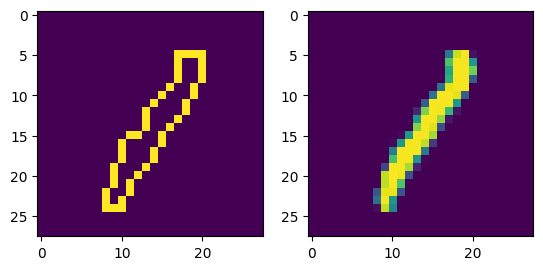

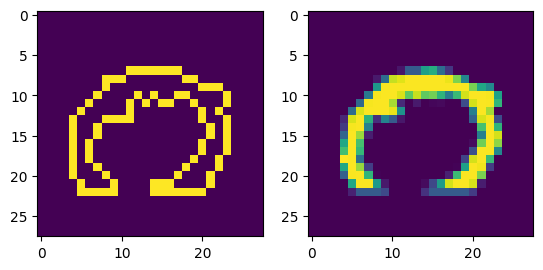

In [43]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getBoundaryPixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

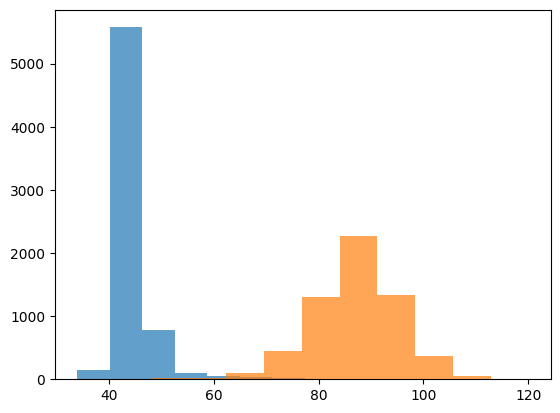

In [44]:
bound1 = np.array([getBoundaryPixels(i).sum() for i in no1])
bound0= np.array([getBoundaryPixels(i).sum() for i in no0])

plt.hist(bound1, alpha=0.7);
plt.hist(bound0, alpha=0.7);

What will happen if we plot two features together?

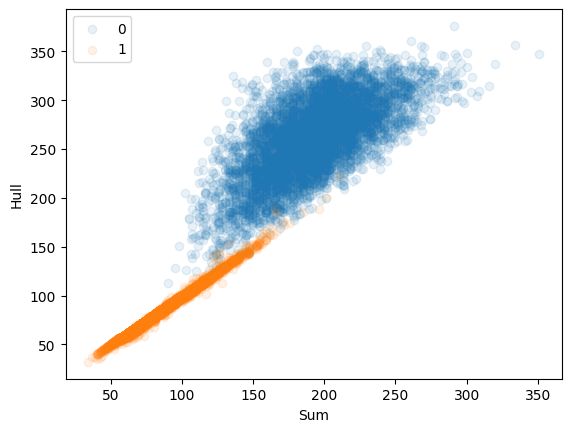

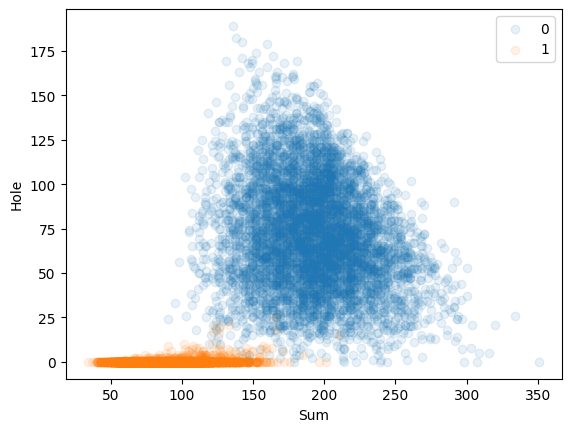

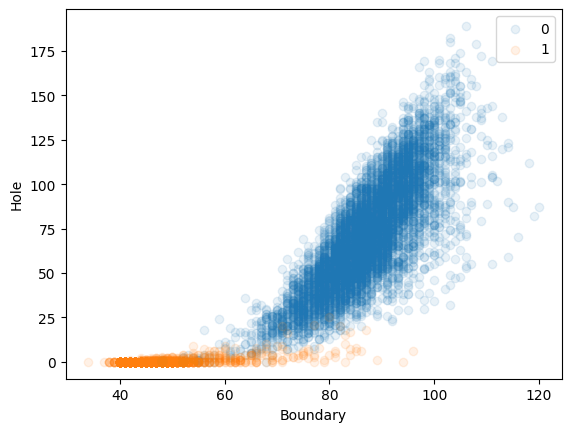

In [45]:
# Sum and hull
plt.scatter(sum0, hull0, alpha=0.1)
plt.scatter(sum1, hull1, alpha=0.1)
plt.xlabel('Sum')
plt.ylabel('Hull')
plt.legend(['0','1'])
plt.show()

# Sum and hole
plt.scatter(sum0, hole0, alpha=0.1)
plt.scatter(sum1, hole1, alpha=0.1)
plt.xlabel('Sum');
plt.ylabel('Hole');
plt.legend(['0','1'])
plt.show()

# Hole and boundary
plt.scatter(bound0, hole0, alpha=0.1)
plt.scatter(bound1, hole1, alpha=0.1)
plt.xlabel('Boundary');
plt.ylabel('Hole');
plt.legend(['0','1'])
plt.show()

Now let us try plotting 3 features together.

In [46]:
cl1 = ['class 1']*len(sum1)
cl0 = ['class 0']*len(sum0)
df = pd.DataFrame(list(zip(np.concatenate((hole0, hole0)), np.concatenate((sum1,sum0)),
                           np.concatenate((bound1,bound0)), np.concatenate((cl1, cl0)))),
               columns =['Hole', 'Sum', 'Boundary', 'Class'])
df.head()
fig = px.scatter_3d(df, x='Hole', y='Sum', z='Boundary', color='Class', opacity=0.1)
fig.show()

Feel free to explore the above graph with your mouse.


We have seen that we extracted four features from a 28*28 dimensional image.


Some questions to explore:
1. Which is the best combination of features?

 - The combination of boundary and hole pixels is the best in distinguishing between the digits 0 and 1. We can see that it caputures both the external and internal aspects of the digit, leading to a better seperation in the feature space.


2. How would you test or visualize four or more features?

   -  We can use Pairplot, or a 3D scatter plot. Here I've used pairplot since pairplot is better for 2-4 features.


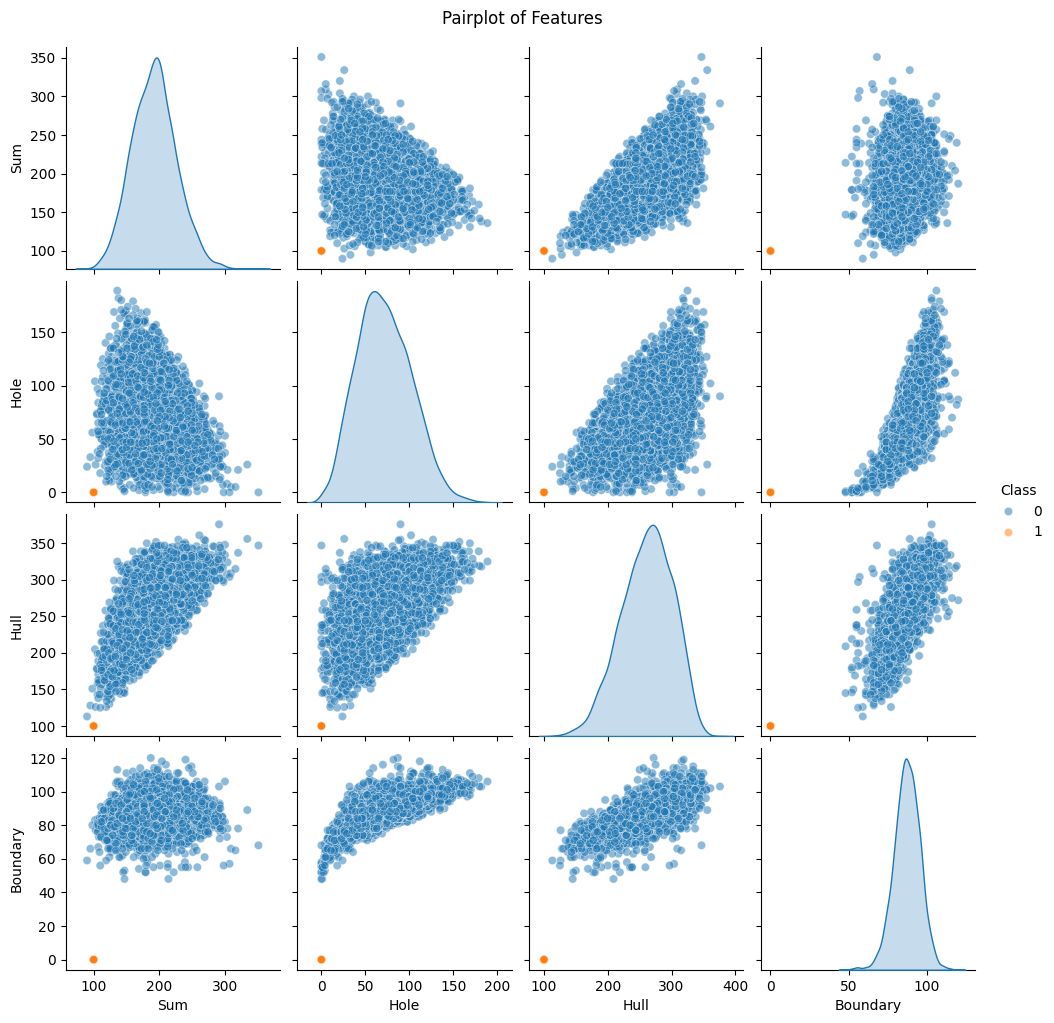

In [54]:
import seaborn as sns

sum1 = np.sum(no1 > 0, axis=(1, 2))
sum0 = np.sum(no0 > 0, axis=(1, 2))

hole1 = np.array([getHolePixels(i).sum() for i in no1])
hole0 = np.array([getHolePixels(i).sum() for i in no0])

hull1 = np.array([getHullPixels(i).sum() for i in no1])
hull0 = np.array([getHullPixels(i).sum() for i in no0])

bound1 = np.array([getBoundaryPixels(i).sum() for i in no1])
bound0 = np.array([getBoundaryPixels(i).sum() for i in no0])

df = pd.DataFrame({
    'Sum': np.concatenate([sum0, sum1]),
    'Hole': np.concatenate([hole0, hole1]),
    'Hull': np.concatenate([hull0, hull1]),
    'Boundary': np.concatenate([bound0, bound1]),
    'Class': ['0'] * len(sum0) + ['1'] * len(sum1)
})

sns.pairplot(df, hue='Class', plot_kws={'alpha': 0.5})
plt.suptitle('Pairplot of Features', y=1.02)
plt.show()


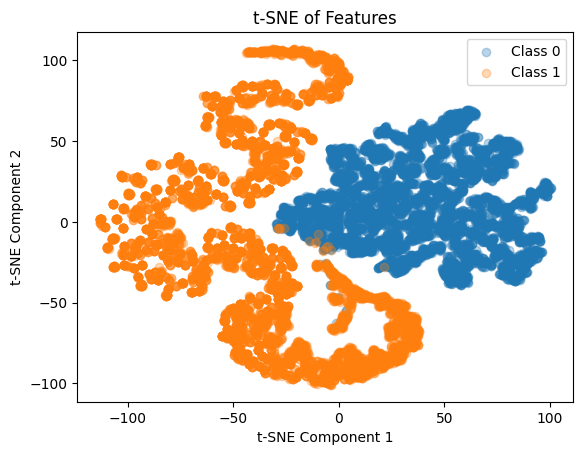

In [48]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(df.drop('Class', axis=1))

plt.scatter(X_tsne[df['Class']=='0', 0], X_tsne[df['Class']=='0', 1], alpha=0.3, label='Class 0')
plt.scatter(X_tsne[df['Class']=='1', 0], X_tsne[df['Class']=='1', 1], alpha=0.3, label='Class 1')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.title('t-SNE of Features')
plt.show()

3. Can you come up with your own features?

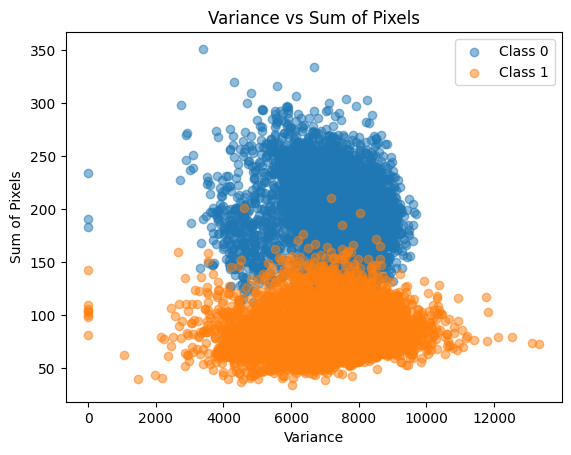

In [49]:
def calculate_variance(img):
    if np.any(img):
        return np.var(img[img > 0])
    else:
        return 0

variance1 = np.array([calculate_variance(i) for i in no1])
variance0 = np.array([calculate_variance(i) for i in no0])
variance1_flat = variance1.flatten()
variance0_flat = variance0.flatten()

plt.scatter(variance0_flat, sum0, alpha=0.5, label='Class 0')
plt.scatter(variance1_flat, sum1, alpha=0.5, label='Class 1')
plt.xlabel('Variance')
plt.ylabel('Sum of Pixels')
plt.legend()
plt.title('Variance vs Sum of Pixels')
plt.show()

4. Will these features work for different classes other than 0 and 1?
 - Yes. Here I've used the example of variance.

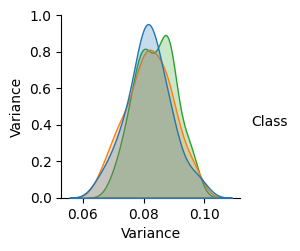

In [60]:
import seaborn as sns

no1 = np.random.rand(100, 10, 10)
no2 = np.random.rand(100, 10, 10)
no3 = np.random.rand(100, 10, 10)

def calculate_variance(img):
    return np.var(img)
variance1 = np.array([calculate_variance(i) for i in no1])
variance2 = np.array([calculate_variance(i) for i in no2])
variance3 = np.array([calculate_variance(i) for i in no3])

df = pd.DataFrame({
    'Variance': np.concatenate([variance1, variance2, variance3]),
    'Class': ['Class 1'] * len(variance1) + ['Class 2'] * len(variance2) + ['Class 3'] * len(variance3)
})

sns.pairplot(df, hue='Class', diag_kind='kde', plot_kws={'alpha': 0.5})
plt.show()



5. What will happen if we take more that two classes at a time?
 - For variance:

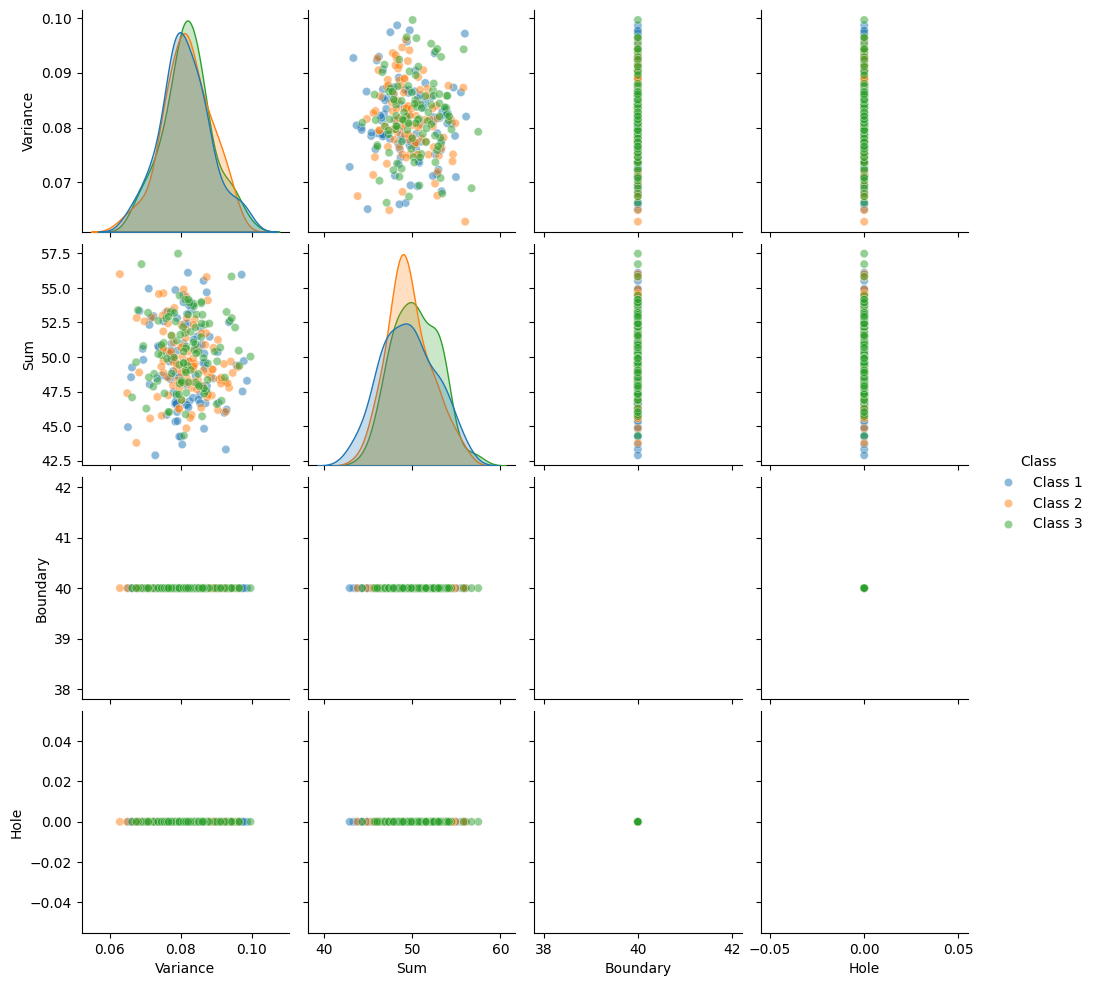

In [58]:
def calculate_hole(img):
    return np.sum(img == 0)

hole1 = np.array([calculate_hole(i) for i in no1])
hole2 = np.array([calculate_hole(i) for i in no2])
hole3 = np.array([calculate_hole(i) for i in no3])


boundary1 = np.array([calculate_boundary(i) for i in no1])
boundary2 = np.array([calculate_boundary(i) for i in no2])
boundary3 = np.array([calculate_boundary(i) for i in no3])

variance1 = np.array([calculate_variance(i) for i in no1])
variance2 = np.array([calculate_variance(i) for i in no2])
variance3 = np.array([calculate_variance(i) for i in no3])

sum1 = np.array([calculate_sum(i) for i in no1])
sum2 = np.array([calculate_sum(i) for i in no2])
sum3 = np.array([calculate_sum(i) for i in no3])

df = pd.DataFrame({
    'Variance': np.concatenate([variance1, variance2, variance3]),
    'Sum': np.concatenate([sum1, sum2, sum3]),
    'Boundary': np.concatenate([boundary1, boundary2, boundary3]),
    'Hole': np.concatenate([hole1, hole2, hole3]),
    'Class': ['Class 1'] * len(variance1) + ['Class 2'] * len(variance2) + ['Class 3'] * len(variance3)
})

sns.pairplot(df, hue='Class', diag_kind='kde', plot_kws={'alpha': 0.5})
plt.show()
